## Q-Learning OpenAi Gym

Environment: Taxi-v3

https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py

## Importing the environment

In [1]:
import gym

env = gym.make('Taxi-v3').env

env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Random Agent

In [2]:
import gym
import time
from IPython.display import clear_output

# create the environment and start the episode
env = gym.make('Taxi-v3').env
state = env.reset()
done = False

# while episode is not finished
while not done:
    action = env.action_space.sample()
    state, _, done, _ = env.step(action)

    # render the image on the display
    clear_output(wait=True)
    env.render()
    time.sleep(1)

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


KeyboardInterrupt: 

## Training the agent

Using Q-Learning

100%|██████████| 10000/10000 [00:05<00:00, 1889.65it/s]



Avg num of steps per episode: 20.9736


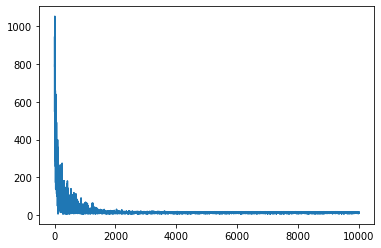

In [3]:
# import libraries
import gym
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
 
# define parameters
training_episodes = 10000
learning_rate = 0.1
discount_factor = 0.9
 
# create a q-table initialized with zeros
q_table = np.zeros([env.observation_space.n, env.action_space.n])
 
# count the number of steps per episode
# used to verify if the agent is learning
steps_per_episode = np.zeros((training_episodes))
    
# main loop
for i in trange(0, training_episodes):
    
    # initialize the episode
    state = env.reset()
    done = False
    num_steps = 0
    
    # while episode is not finished
    while not done:
        
        # increment num of steps
        num_steps += 1
        
        # select a greedy action from q-table
        action = np.argmax(q_table[state])
 
        # perform action in the environment
        next_state, reward, done, _ = env.step(action)
        
        # get current action value
        q_value = q_table[state, action]
        max_q = np.max(q_table[next_state])
        
        # update the action value using Bellman equation
        new_q = q_value + learning_rate * (reward + discount_factor * max_q - q_value)
        q_table[state, action] = new_q
 
        # go to next state
        state = next_state        
        
    # total num of steps per episode
    steps_per_episode[i] = num_steps
 
# print results
print("\nAvg num of steps per episode: " + str(np.mean(steps_per_episode)))
plt.plot(steps_per_episode)
plt.show()  

## Testing the agent

In [4]:
# import libraries
import time

# used to clear colab notebook display
from IPython.display import clear_output

# num of test episodes
test_episodes = 5

# run each test episode
for i in range(test_episodes):
    
    # start the episode
    state = env.reset()    
    done = False
    
    # while episode is not finished
    while not done:
        # select a greedy action from q-table
        action = np.argmax(q_table[state])
        state, _, done, _ = env.step(action)

        # render the image on the display
        clear_output(wait=True)
        env.render()
        time.sleep(1)
        
    # the episode is done
    print("Finished episode " + str(i+1) + "/" + str(test_episodes))
    time.sleep(3)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Finished episode 5/5
